In [ ]:
import pandas as pd

In [ ]:
rest = pd.read_csv('cargo_departures.csv')
rest = rest.fillna(0)
rest.drop('Day', axis=1, inplace=True)
rest.head(5)

,Boksit,Izvestnyak,KoncentratZ,Okatysh,EmptyWagon,RudaZ,Ugol
0,14888.4,6275.0,0.0,0.0,13400.0,11937.8,32493.0
1,19857.0,0.0,0.0,0.0,19959.9,5960.0,25947.2
2,9928.3,6273.0,0.0,0.0,16602.0,17918.0,45019.2
3,19851.5,6275.0,0.0,0.0,14929.0,5964.0,52171.0
4,4961.5,6274.0,0.0,0.0,11572.0,11877.0,39041.9


In [ ]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Boksit       1101 non-null   float64
 1   Izvestnyak   1101 non-null   float64
 2   KoncentratZ  1101 non-null   float64
 3   Okatysh      1101 non-null   float64
 4   EmptyWagon   1101 non-null   float64
 5   RudaZ        1101 non-null   float64
 6   Ugol         1101 non-null   float64
dtypes: float64(7)
memory usage: 60.3 KB


In [ ]:
rest.isnull().sum()

,0
Boksit,0
Izvestnyak,0
KoncentratZ,0
Okatysh,0
EmptyWagon,0
RudaZ,0
Ugol,0


In [ ]:
rest.describe()

,Boksit,Izvestnyak,KoncentratZ,Okatysh,EmptyWagon,RudaZ,Ugol
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,16323.603642,6066.846866,3163.364668,2424.597911,19072.289464,1859.645141,47005.456612
std,6852.047089,3054.506856,3593.516173,3159.117150,3089.938826,3909.727412,8809.135974
min,0.000000,0.000000,0.000000,0.000000,6580.000000,0.000000,12550.600000
25%,14582.900000,6264.800000,0.000000,0.000000,16731.100000,0.000000,39096.800000
50%,14892.200000,6269.000000,4411.000000,0.000000,19124.500000,0.000000,45393.400000
75%,19853.100000,6272.900000,4497.500000,4495.300000,21164.300000,0.000000,51865.700000
max,58644.100000,12556.300000,17985.800000,13508.600000,28168.000000,17937.000000,116827.600000


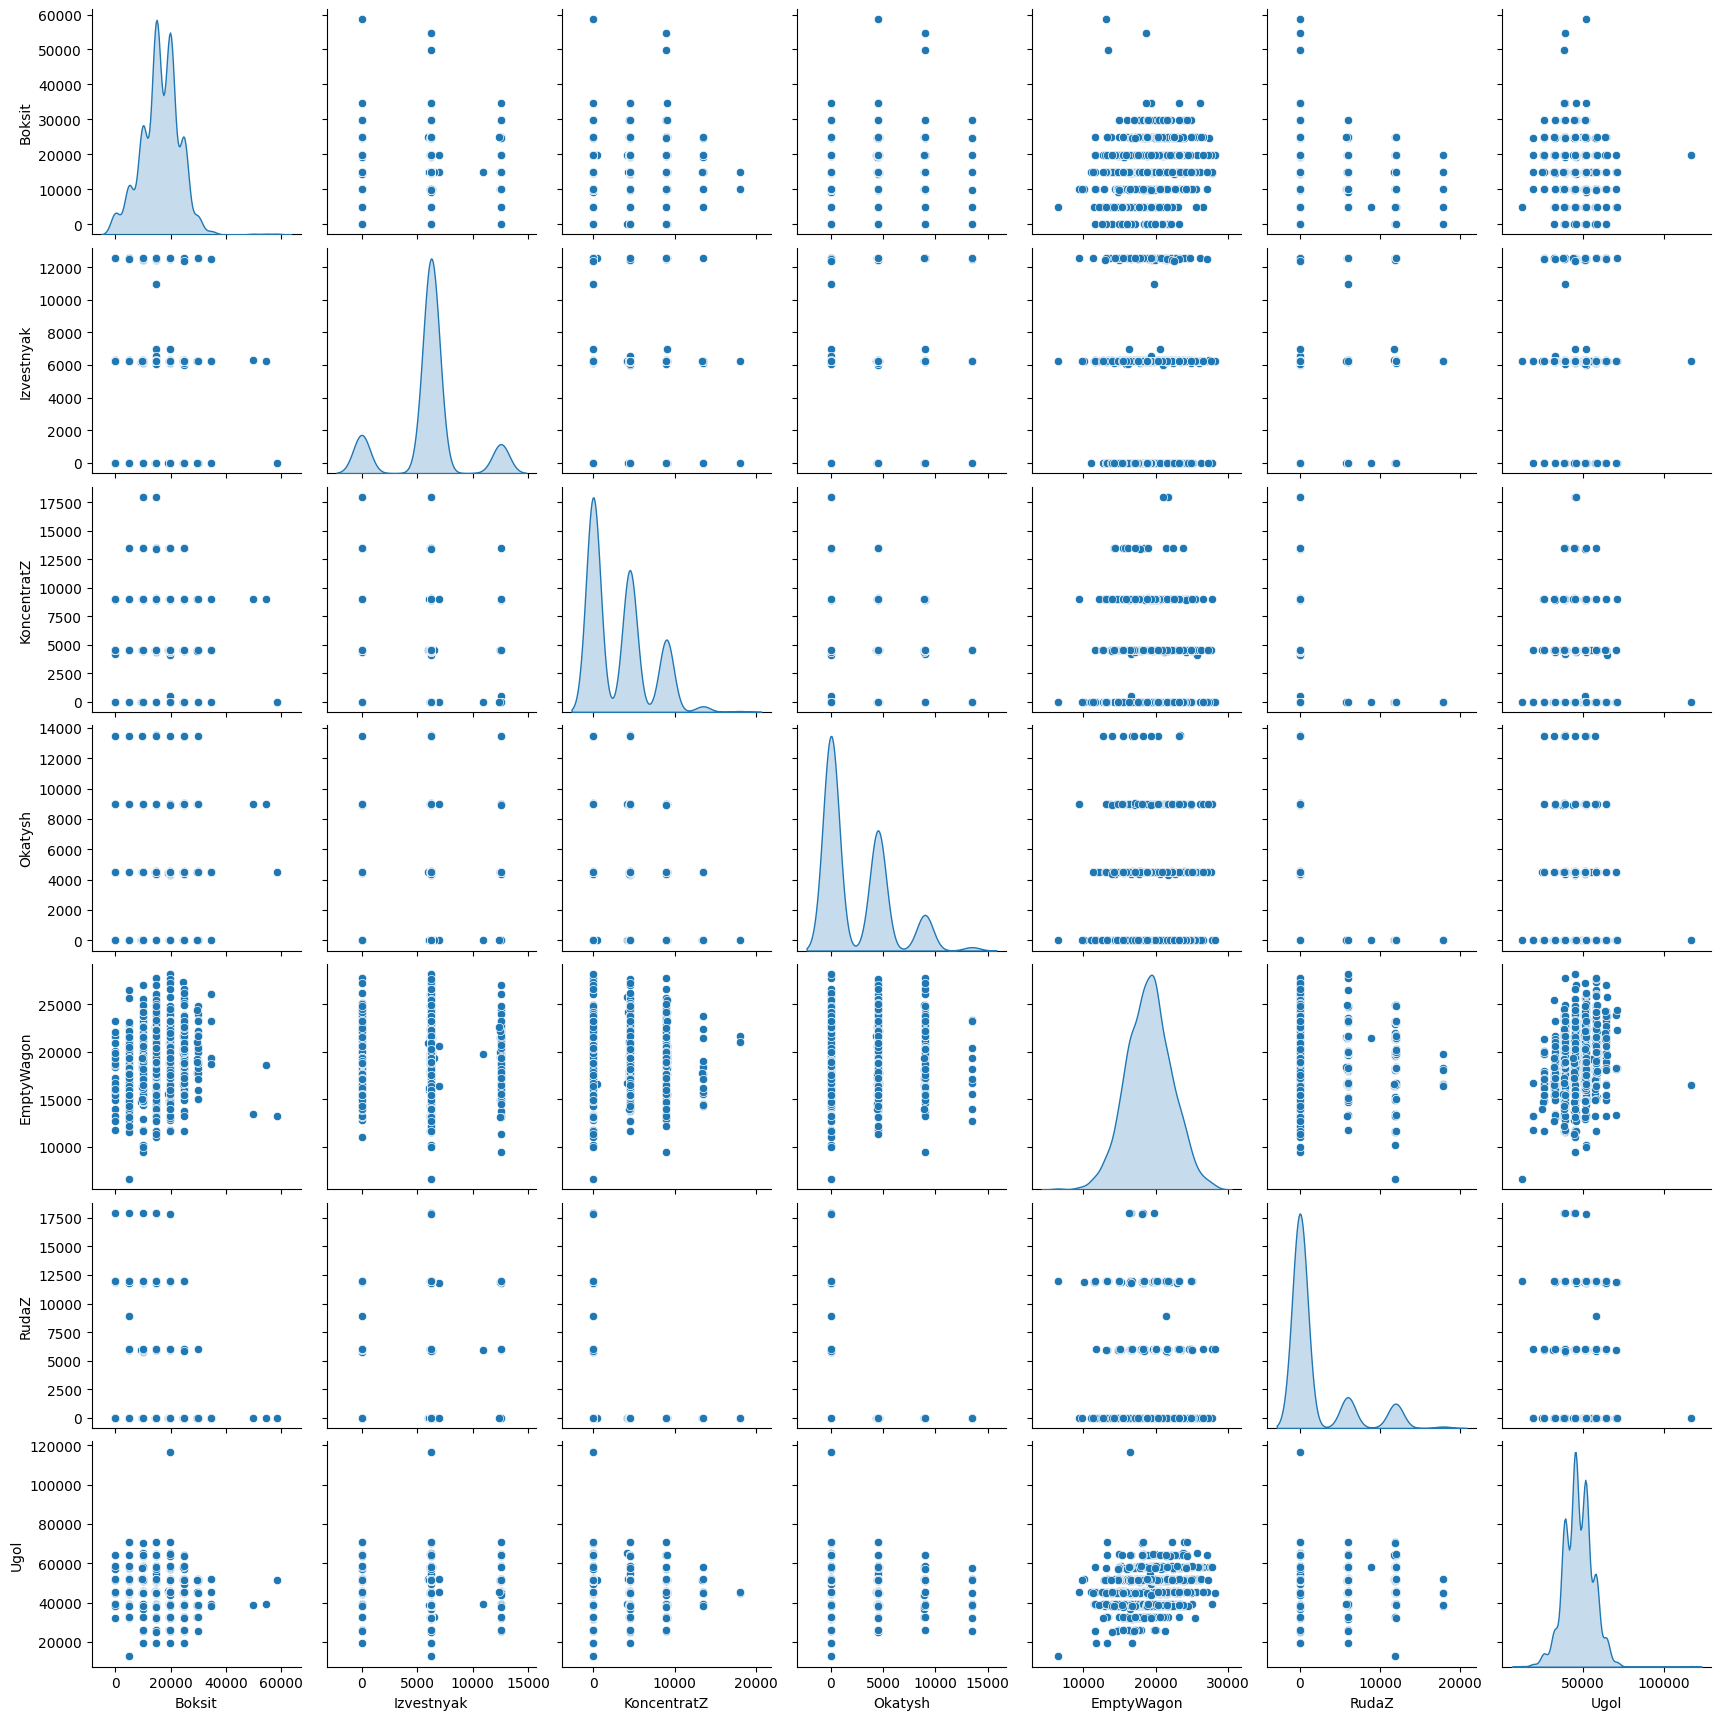

In [ ]:
import seaborn as sns
sns.pairplot(rest, diag_kind='kde')

<Axes: >

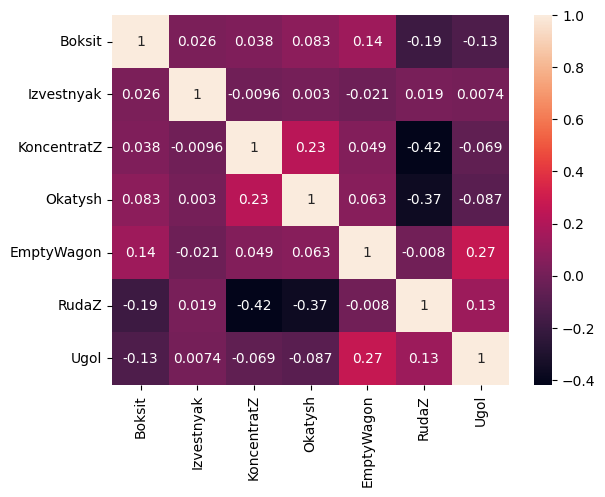

In [ ]:
sns.heatmap(rest.corr(), annot=True)

In [ ]:
X = rest.drop(['Boksit', 'Okatysh', 'Ugol'], axis=1)
X.head()

,Izvestnyak,KoncentratZ,EmptyWagon,RudaZ
0,6275.0,0.0,13400.0,11937.8
1,0.0,0.0,19959.9,5960.0
2,6273.0,0.0,16602.0,17918.0
3,6275.0,0.0,14929.0,5964.0
4,6274.0,0.0,11572.0,11877.0


In [ ]:
y = rest['EmptyWagon']
y.head()

,EmptyWagon
0,13400.0
1,19959.9
2,16602.0
3,14929.0
4,11572.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-6.16333881e-17,  8.32667268e-16,  1.00000000e+00,  3.33066907e-16])

In [ ]:
model.intercept_

-3.637978807091713e-12

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_squared_error(y_pred, y_test)

7.336081450696535e-24

In [ ]:
mean_absolute_error(y_pred, y_test)

1.8272201248288694e-12

In [ ]:
y_test.mean()

19089.35701357466